In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('/content/IPL_Squad_2023_Auction_Dataset.csv')
df

,Unnamed: 0,Player's List,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team
0,0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans
1,1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans
2,2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,Gujarat Titans
3,3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,Gujarat Titans
4,4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...,...
563,563,Dhruv Patel,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold
564,564,Jack Prestwidge,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold
565,565,Aditya Sarvate,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold
566,566,Sagar Solanki,2000000,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       568 non-null    int64  
 1   Player's List    568 non-null    object 
 2   Base Price       568 non-null    object 
 3   TYPE             568 non-null    object 
 4   COST IN ₹ (CR.)  243 non-null    float64
 5   Cost IN $ (000)  243 non-null    float64
 6   2022 Squad       230 non-null    object 
 7   Team             568 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.6+ KB


In [18]:
df.shape

(568, 8)

In [19]:
df.describe()

,Unnamed: 0,COST IN ₹ (CR.),Cost IN $ (000)
count,568.000000,243.000000,243.000000
mean,283.500000,0.687243,82.469136
std,164.111751,2.511700,301.404032
min,0.000000,0.000000,0.000000
25%,141.750000,0.000000,0.000000
50%,283.500000,0.000000,0.000000
75%,425.250000,0.200000,24.000000
max,567.000000,18.500000,2220.000000


# Deleting redundant **columns**

In [20]:
df.drop(columns=[ 'Unnamed: 0'], inplace=True)

# ** handling** Missing Values

In [21]:
df.isnull().sum()

,0
Player's List,0
Base Price,0
TYPE,0
COST IN ₹ (CR.),325
Cost IN $ (000),325
2022 Squad,338
Team,0


In [24]:
df['COST IN ₹ (CR.)'] = df['COST IN ₹ (CR.)'].fillna(0)
df['Cost IN $ (000)'] = df['Cost IN $ (000)'].fillna(0)

In [25]:
df[['COST IN ₹ (CR.)', 'Cost IN $ (000)']].isna().sum()


,0
COST IN ₹ (CR.),0
Cost IN $ (000),0


In [37]:
df['2022 Squad'] = df['2022 Squad'].fillna('No Squad')


# Feature Engineering


In [26]:
df['Base Price'].unique()

array(['4000000', '5000000', '20000000', '2000000', 'Retained',
       '10000000', '1500000', '7500000', '3000000', '15000000'],
      dtype=object)

In [27]:
df['Base Price Numeric'] = df['Base Price']

In [28]:
df['Base Price Numeric']=df['Base Price Numeric'].replace('Retained',0)

In [30]:
df['Base Price Numeric']=df['Base Price Numeric'].astype(int)

In [33]:
df['Base Price'].unique()


array(['4000000', '5000000', '20000000', '2000000', 'Retained',
       '10000000', '1500000', '7500000', '3000000', '15000000'],
      dtype=object)

In [34]:
df['sold']=df['COST IN ₹ (CR.)'].apply(lambda X: 1 if X>0 else 0)

In [36]:
df['sold'].value_counts()

,count
sold,
0,488
1,80


In [41]:
df['profit']= df['COST IN ₹ (CR.)']-df['Base Price Numeric']

In [40]:
df.sort_values(by='profit', ascending=False).head()


,Player's List,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team,Base Price Numeric,sold,profit
20,Darshan Nalkande,Retained,ALL-ROUNDER,0.0,0.0,GT,Gujarat Titans,0,0,0.0
19,Abhinav Sadarangani,Retained,BATSMAN,0.0,0.0,GT,Gujarat Titans,0,0,0.0
18,Alzarri Joseph,Retained,BOWLER,0.0,0.0,GT,Gujarat Titans,0,0,0.0
17,B. Sai Sudharsan,Retained,ALL-ROUNDER,0.0,0.0,GT,Gujarat Titans,0,0,0.0
16,Hardik Pandya,Retained,ALL-ROUNDER,0.0,0.0,GT,Gujarat Titans,0,0,0.0


# **EDA**

/tmp/ipython-input-2155092872.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sold',data=df, palette=['#f8bbd0', '#ec407a'])


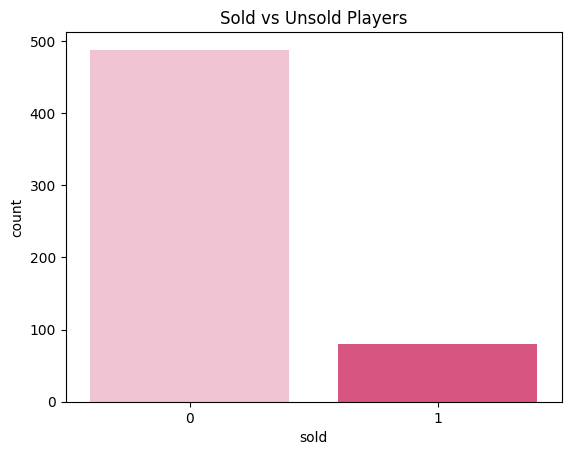

In [48]:
sns.countplot(x='sold',data=df, palette=['#f8bbd0', '#ec407a'])
plt.title("Sold vs Unsold Players")
plt.show()

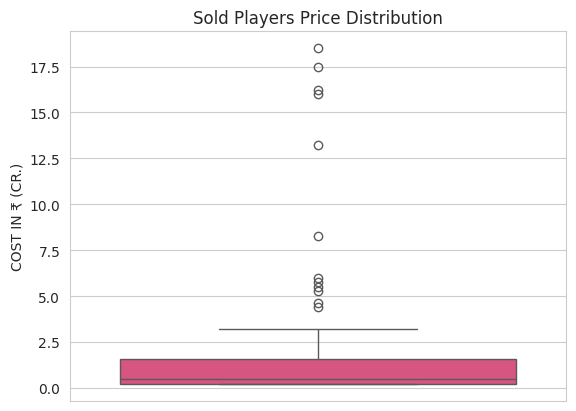

In [59]:
sns.set_style("whitegrid")
sns.boxplot(
    y='COST IN ₹ (CR.)',
    data=df[df['sold'] == 1],
    color='#ec407a'
)
plt.title("Sold Players Price Distribution")
plt.show()

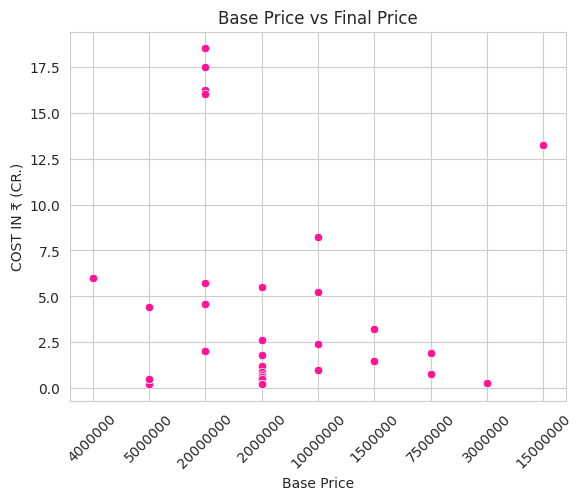

In [62]:
sns.scatterplot(
    x='Base Price',
    y='COST IN ₹ (CR.)',
    data=df[df['sold'] == 1],
    color='deeppink'
)
plt.xticks(rotation=45)
plt.title("Base Price vs Final Price")
plt.show()